In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt1
from matplotlib import pyplot as plt2
import uproot
import pandas as pd
from histbook import *
from vega import VegaLite as canvas                
import vega
from sklearn import datasets
from sklearn import linear_model
import numpy.testing as npt
from matplotlib.colors import LogNorm
import h5py
from scipy.optimize import nnls
from scipy.optimize import lsq_linear

In [2]:
def rmseff(x, c=0.68):
    """Compute half-width of the shortest interval containing a fraction 'c' of items in a 1D array."""
    x_sorted = np.sort(x, kind="mergesort") 
    m = int(c * len(x)) + 1
    return np.min(x_sorted[m:] - x_sorted[:-m]) / 2.0

In [3]:
def sig(df):
    d = pd.DataFrame()
    sel0 = ((df.best_match==True) & (abs(df.genpart_eta) < maxeta))
    sel = (abs(df.genpart_eta) < maxeta)
    srr = (df[sel].cl3d_srrtot)
    d['srr'] = srr
    spp = pd.Series(df[sel].cl3d_spptot)
    d['spp'] = spp
    return d

In [4]:
def delta(df):
    d = pd.DataFrame()
    d1 = pd.DataFrame()
    sel0 = (df.best_match==True)
    r0 = np.tan(2*np.arctan(np.exp(-df[sel0].cl3d_eta)))
    r1 = np.tan(2*np.arctan(np.exp(-df.cl3d_eta)))
    tmpr = r1 - r0
    dr = tmpr
    tmpphi = df.cl3d_phi-df[sel0].cl3d_phi
    dphi = tmpphi
    mgeneta = (df[sel0].genpart_eta) #
    #mgeneta = pd.Series(df[sel0].genpart_eta)
    d['dr'] = dr
    d['dphi'] = dphi
    print(len(d))
    d['mgeneta'] = mgeneta
    #d = pd.concat([d, d1], axis=1, ignore_index=True)
    print(d)
    return d

In [5]:
#varying = 'clustering'
varying = 'FE'

if(varying == 'clustering'):
    algosAll=np.array([['F8T0','F8T0th0','F8T0th20','F8T0dr50','F8T0dr200'],
                       ['F8T1','F8T1th0','F8T1th20','F8T1dr50','F8T1dr200'],
                       ['F8T','F8Tth0','F8Tth20','F8Tdr50','F8Tdr200'],
                       ['F8BC','F8BCth0','F8BCth20','F8BCdr50','F8BCdr200'],
                       ['F8STC','F8STCth0','F8STCth20','F8STCdr50','F8STCdr200'],
                       ['F8STC4444','F8STC4444th0','F8STC4444th20','F8STC4444dr50','F8STC4444dr200'],
                       ['F8ES','F8ESth0','F8ESth20','F8ESdr50','F8ESdr200'],
                       ['F8OB','F8OBth0','F8OBth20','F8OBdr50','F8OBdr200'],
                       ['F8BCdcen','F8BCdcenth0','F8BCdcenth20','F8BCdcendr50','F8BCdcendr200']])
    algolabels=['default','th0','th20','dr50%','dr200%']
    algolabelsPlot=['Threshold0MIPT','Threshold1MIPT', 'Threshold1.35MIPT','BestChoice','STC4+16','STC4+CTC4','EqualShare','STC fractions','BC decentralised']
    algos=algosAll[2]
    algolabelPlot=algolabelsPlot[2]
if(varying == 'FE'):
    algosAll=np.array([['F8T0','F8T1','F8T','F8BC','F8STC','F8STC4444','F8ES','F8OB','F8BCdcen'],
           ['F8T0th0','F8T1th0','F8Tth0','F8BCth0','F8STCth0','F8STC4444th0','F8ESth0','F8OBth0','F8BCdcenth0'],
           ['F8T0th20','F8T1th20','F8Tth20','F8BCth20','F8STCth20','F8STC4444th0','F8ESth20','F8OBth20','F8BCdcenth20'],
           ['F8T0dr50','F8T1dr50','F8Tdr50','F8BCdr50','F8STCdr50','F8STC4444dr50','F8ESdr50','F8OBdr50','F8BCdcendr50'],
           ['F8T0dr200','F8T1dr200','F8Tdr200','F8BCdr200','F8STCdr200','F8STC4444dr200','F8ESdr200','F8OBdr200','F8BCdcendr200']])
    algolabels=['Threshold 0 MIPT','Threshold 1 MIPT', 'Threshold 1.35 MIPT','Best Choice','STC4+16','STC4+CTC4','Equal share','STC fractions','BC decentralised']    
    algolabelsPlot=['default','th0','th20','dr50','dr200']
    algos=algosAll[3]
    algolabelPlot=algolabelsPlot[3]
binning_study = 'False' 
plotresolution = 'False'
maxeta = 3.0
algo={}

In [6]:
pwdir=os.getcwd()
for i in range(len(algos)):
    algo[i]=pd.read_hdf('/data_CMS/cms/ahuja/HGCAL/ntuples/tpgV3131/Outputhdf5files/RelValV10/RelValDiG_Pt10To100_Eta1p6To2p9_EWthrdrvariationsPU140/{}.hdf5'.format(algos[i]))
    

In [7]:
factor={} 
if(binning_study  == 'True'):        
    for i in algo:
        print(algos[i]) 
    
        gen_eta = algo[i]['genpart_eta']
        gen_phi = algo[i]['genpart_phi']
        gen_pt = algo[i]['genpart_pt']
        clusters = algo[i]['cl3d_n']
        dR = algo[i]['deltar']
        cl_pt = algo[i]['cl3d_pt']
        cl_eta = algo[i]['cl3d_eta']
        cl_phi = algo[i]['cl3d_phi']
        cl_spp = algo[i]['cl3d_spptot']
        cl_srr = algo[i]['cl3d_srrtot']
        cl_layer_pt = algo[i]['layer']
    
        gen_eta = gen_eta[~np.isnan(clusters)]
        gen_phi = gen_phi[~np.isnan(clusters)]
        gen_pt = gen_pt[~np.isnan(clusters)]
        cl_pt = cl_pt[~np.isnan(clusters)]
        cl_phi = cl_phi[~np.isnan(clusters)] 
        cl_eta = cl_eta[~np.isnan(clusters)]
        cl_spp = cl_spp[~np.isnan(clusters)]
        cl_srr = cl_srr[~np.isnan(clusters)]
        clusters = clusters[~np.isnan(clusters)]
        dR = dR[~np.isnan(dR)]
        sel0 = ~np.isnan(clusters) 
        res = (algo[i]['cl3d_pt'])/algo[i]['genpart_pt']  
        res = res[~np.isnan(res)]

        df_x = algo[i].copy()
        gb = (df_x.groupby(['event']).best_match.size())#.ffill()
        df_y = df_x[gb>1].copy()
        r = delta(df_y)
        s = sig(df_y)
        sel = ((r.dr > 0.0) & (r.dphi > 0.0))
        plt.figure(figsize=(24,18))
        plt.subplot(341)
        plt.hist(np.abs(r.dr)[sel],bins=np.linspace(0.0,0.02,100),histtype='step',color='red',label=algos[i]);
        plt.xlabel('d_r(seed,secCl)')
        plt.legend(fontsize=12)
        plt.subplot(342)
        plt.hist(np.abs(r.dphi)[sel],bins=np.linspace(0.0,0.15,75),histtype='step',color='red',label=algos[i]);
        plt.xlabel('d_phi(seed,secCl)')
        plt.subplot(343)
        plt.hist(np.abs(r.mgeneta)[sel],80,histtype='step',color='red',label=algos[i]);
        plt.xlabel('geneta')
        plt.subplot(344)
        plt.hist2d(np.abs(r.dphi)[sel],np.abs(r.dr)[sel],bins=(150,200),range=[[0.0,0.15],[0.0,0.02]],cmap=plt.cm.jet,norm=LogNorm())
        plt.xlabel('d_phi(seed,secCl)')
        plt.ylabel('d_r(seed,secCl)')
        plt.colorbar()
        plt.subplot(345)
        plt.hist2d(np.abs(r.mgeneta)[sel],np.abs(r.dr)[sel],bins=(160,200),range=[[1.4,3.0],[0.0,0.02]],cmap=plt.cm.jet,norm=LogNorm())
        plt.xlabel('geneta')
        plt.ylabel('d_r(seed,secCl)')
        plt.colorbar()
        plt.subplot(346)
        plt.hist2d(np.abs(r.mgeneta)[sel],np.abs(r.dphi)[sel],bins=(160,150),range=[[1.4,3.0],[0.0,0.15]],cmap=plt.cm.jet,norm=LogNorm())
        plt.xlabel('geneta')
        plt.ylabel('d_phi(seed,secCl)')
        plt.legend(fontsize=12)
        plt.colorbar()
        plt.subplot(347)
        plt.hist(cl_spp,125,histtype='step',color='red',label=algos[i]);
        plt.xlabel('cl_spp')
        plt.subplot(348)
        plt.hist(cl_srr,100,histtype='step',color='red',label=algos[i]);
        plt.xlabel('cl_srr')
        plt.subplot(349)
        plt.hist2d(np.abs(gen_eta),cl_spp,bins=(160,125),range=[[1.4,3.0],[0.0,0.25]],cmap=plt.cm.jet,norm=LogNorm())
        plt.xlabel('geneta')
        plt.ylabel('s_phiphi')
        plt.colorbar()
        plt.subplot(3,4,10)
        plt.hist2d(np.abs(gen_eta),cl_srr,bins=(160,100),range=[[1.4,3.0],[0.0,0.0225]],cmap=plt.cm.jet,norm=LogNorm())
        plt.xlabel('geneta')
        plt.ylabel('s_rr')
        plt.colorbar()
        #plt.subplot(3,4,11)
        #plt.hist2d(np.abs(r.dphi)[sel],s.spp[sel],bins=(150,125),range=[[0.0,0.15],[0.0,0.25]],cmap=plt.cm.jet,norm=LogNorm())
        #plt.xlabel('d_phi(seed,secCl)')
        #plt.ylabel('s_pp')
        #plt.colorbar()
        #plt.subplot(3,4,12)
        #plt.hist2d(np.abs(r.dr)[sel],s.srr[sel],bins=(200,100),range=[[0.0,0.02],[0.0,0.0225]],cmap=plt.cm.jet,norm=LogNorm())
        #plt.xlabel('d_r(seed,secCl)')
        #plt.ylabel('s_rr')
        #plt.colorbar()
        plt.savefig('Clsplitting_'+ algos[i] +'.png') 

In [8]:
##weights from PU0          ##T0                              
coefflinblsqPU0 = np.array([[2.0, 1.822043, 0.9075068, 1.0120313, 1.0095831, 1.1330347, 0.96639156, 1.0349561, 1.0286291, 0.7382304, 0.86902285, 1.265828, 2.0, 2.0],
                            [2.0, 1.8423234, 0.9069007, 1.0133288, 1.0081666, 1.1347235, 0.97360873, 1.0362381, 1.0288138, 0.73068696, 0.89861345, 1.2588305, 2.0, 2.0],
                            [2.0, 1.8215138, 0.9076768, 1.0118759, 1.0098157, 1.1329198, 0.9664035, 1.0350547, 1.0275273, 0.73935246, 0.87094945, 1.263296, 2.0, 2.0],
                            [2.0, 2.0, 1.1960554, 0.94832414, 1.2714863, 1.1713725, 0.9387395, 1.165218, 1.0842837, 0.7118725, 0.88613814, 1.3844795, 2.0, 2.0],
                            [2.0, 1.8084923, 0.84509623, 0.9758451, 0.98544234, 1.1087834, 0.9506512, 1.0268048, 1.0033048, 0.7321877, 0.88989514, 1.2214806, 2.0, 2.0],
                            ##T1
                            [2.0, 1.920783, 0.9579704, 1.0200992, 1.019983, 1.1716932, 1.0240271, 1.0561504, 1.0501709, 0.83894813, 0.9261438, 1.2454351, 2.0, 2.0],
                            [2.0, 1.9337385, 0.9554816, 1.0236902, 1.0193082, 1.1727369, 1.0279374, 1.0524021, 1.0585444, 0.82901293, 0.9457686, 1.2352723, 2.0, 2.0],
                            [2.0, 1.920594, 0.9579934, 1.0200696, 1.0200864, 1.1716402, 1.0239565, 1.0565516, 1.0490719, 0.83893085, 0.9295548, 1.242271, 2.0, 2.0],
                            [2.0, 2.0, 1.2344894, 0.9514144, 1.2749664, 1.1854947, 0.9735366, 1.1553638, 1.0889399, 0.771146, 0.94525385, 1.314933, 2.0, 2.0],
                            [2.0, 1.9073513, 0.9284798, 0.9813794, 1.0153967, 1.1620249, 1.0068113, 1.0740403, 1.0399436, 0.8278114, 0.9396132, 1.2287176, 2.0, 2.0],
                            ##T
                            [2.0, 1.9760932, 0.97969234, 1.0229368, 1.0327249, 1.1863543, 1.0434387, 1.0676814, 1.0616755, 0.8690231, 0.94801676, 1.236919, 2.0, 2.0],
                            [2.0, 1.992984, 0.9725748, 1.0272105, 1.0331553, 1.1872354, 1.0457169, 1.065091, 1.0618926, 0.8624714, 0.982531, 1.2113876, 2.0, 2.0],
                            [2.0, 1.9759846, 0.9796949, 1.0229478, 1.0327376, 1.1863416, 1.0435435, 1.0676862, 1.0613023, 0.8678942, 0.9520448, 1.2339048, 2.0, 2.0],
                            [2.0, 2.0, 1.2493613, 0.9563931, 1.2721713, 1.1920258, 0.9931365, 1.1542509, 1.0941478, 0.78434455, 0.9863021, 1.2818346, 2.0, 2.0],
                            [2.0, 1.9794866, 0.9552595, 0.98685503, 1.0376266, 1.1790907, 1.0229723, 1.0920011, 1.0528109, 0.8548827, 0.96615565, 1.2209896, 2.0, 2.0],
                            ##BC
                            [2.0, 1.8476738, 0.87124944, 1.0414554, 1.0083516, 1.1277076, 0.97253895, 1.045095, 1.0562394, 0.6756936, 0.92084813, 1.2904862, 2.0, 2.0],
                            [2.0, 1.8702227, 0.8689562, 1.0439156, 1.0061697, 1.1305773, 0.97909796, 1.0483104, 1.0510482, 0.67285275, 0.9597142, 1.2677203, 2.0, 2.0],
                            [2.0, 1.8471795, 0.87141335, 1.0412999, 1.0085759, 1.1276054, 0.97254133, 1.0452269, 1.055066, 0.6769366, 0.92266417, 1.2879672, 2.0, 2.0],
                            [2.0, 2.0, 1.1849908, 0.9552349, 1.2726076, 1.1698711, 0.9401768, 1.1655293, 1.0938028, 0.6956224, 0.9322876, 1.3647357, 2.0, 2.0],
                            [2.0, 1.8624755, 0.79963684, 1.0137073, 0.9853712, 1.1003585, 0.95666707, 1.0411255, 1.038104, 0.6541824, 0.9387592, 1.2600093, 2.0, 2.0],
                            ##STC
                            [2.0, 1.7733207, 0.90496165, 0.9866626, 1.0076035, 1.1319597, 0.9660741, 1.0282116, 1.0273615, 0.73799384, 0.89365315, 1.2434669, 2.0, 2.0],
                            [2.0, 1.771084, 0.90598434, 0.9865306, 1.007512, 1.1321769, 0.9660323, 1.0281762, 1.0275077, 0.73742735, 0.89471424, 1.2428006, 2.0, 2.0],
                            [2.0, 1.7733207, 0.90496165, 0.9866626, 1.0076035, 1.1319597, 0.9660741, 1.0282116, 1.0273615, 0.73799384, 0.89365315, 1.2434669, 2.0, 2.0],
                            [2.0, 1.9866903, 1.0068666, 0.8502761, 1.201649, 1.1572971, 0.89921457, 1.1862595, 1.033419, 0.73595005, 0.86752564, 1.3987147, 2.0, 2.0],
                            [2.0, 1.7699198, 0.8655669, 0.9632025, 0.9909607, 1.1114234, 0.94597465, 1.0220991, 1.0006225, 0.7347016, 0.90730214, 1.2012372, 2.0, 2.0],
                            ##STC4444
                            [2.0, 1.6162887, 1.0650676, 0.92537755, 1.0259899, 1.1888574, 0.8210462, 1.0665112, 1.257984, 0.6386176, 0.6987398, 1.3562384, 2.0, 2.0],
                            [2.0, 1.6172409, 1.0647322, 0.92544144, 1.0261301, 1.1888461, 0.820948, 1.0664568, 1.2580355, 0.6387527, 0.69975746, 1.3549362, 2.0, 2.0],
                            [2.0, 1.6162887, 1.0650676, 0.92537755, 1.0259899, 1.1888574, 0.8210462, 1.0665112, 1.257984, 0.6386176, 0.6987398, 1.3562384, 2.0, 2.0],
                            [2.0, 2.0, 1.4949981, 0.5, 1.4360691, 1.3012391, 0.5119503, 1.6496911, 1.1824446, 0.5, 0.5, 1.4815125, 2.0, 2.0],
                            [2.0, 1.5845722, 1.0089672, 0.90384924, 0.99861735, 1.1670669, 0.81192684, 1.0461771, 1.2299354, 0.6641506, 0.6982226, 1.3070078, 2.0, 2.0],
                            ##ES
                            [2.0, 2.0, 1.1783137, 0.5, 2.0, 0.73714924, 0.5, 1.770456, 0.9886605, 0.5, 0.5172164, 1.54354, 2.0, 2.0],
                            [2.0, 2.0, 1.1783298, 0.5, 2.0, 0.7371789, 0.5, 1.7703714, 0.988775, 0.5, 0.51725346, 1.5434875, 2.0, 2.0],
                            [2.0, 2.0, 1.1783137, 0.5, 2.0, 0.73714924, 0.5, 1.770456, 0.9886605, 0.5, 0.5172164, 1.54354, 2.0, 2.0],
                            [2.5444903, 2.5444903, 1.9782135, 1.310494, 1.0794713, 1.3937687, 1.154532, 1.2165337, 1.387423, 0.68808985, 1.0970858, 1.392948, 1.3946943, 2.5444903],
                            #[2.0, 2.0, 2.0, 0.7081903, 2.0, 2.0, 0.5, 2.0, 2.0, 0.5, 0.5, 2.0, 2.0, 0.5],
                            [2.0, 1.9166411, 0.8156699, 0.98288727, 1.0052177, 1.0821079, 0.9491669, 1.0225618, 1.0304712, 0.7240448, 0.8906142, 1.1964206, 2.0, 2.0],
                            ##OB
                            [2.0, 2.0, 1.3699841, 0.5, 1.6076646, 1.0636023, 0.5, 1.4325974, 1.1737821, 0.51212376, 0.7505568, 1.3339623, 2.0, 2.0],
                            [2.0, 2.0, 1.3699484, 0.5, 1.6076078, 1.0637963, 0.5, 1.432297, 1.1739904, 0.5122195, 0.7504634, 1.3341453, 2.0, 2.0],
                            [2.0, 2.0, 1.3699841, 0.5, 1.6076646, 1.0636023, 0.5, 1.4325974, 1.1737821, 0.51212376, 0.7505568, 1.3339623, 2.0, 2.0],
                            [2.0, 2.0, 2.0, 2.0, 2.0, 1.0863221, 0.5, 2.0, 2.0, 0.5, 0.5, 2.0, 0.49999994, 2.0],
                            [2.0, 1.7938386, 0.8709848, 0.9602149, 0.98627806, 1.1254822, 0.92175466, 1.0205998, 1.0324106, 0.758921, 0.8534255, 1.2030802, 2.0, 2.0],
                            ##BCdcen
                            [2.0, 1.7942885, 0.92552835, 1.0399828, 1.0420897, 1.192849, 1.2287227, 1.2101793, 1.1526113, 0.77899575, 1.1256474, 1.7737322, 2.0, 2.0],
                            [2.0, 1.809065, 0.9234928, 1.0456009, 1.038069, 1.1954467, 1.2428007, 1.2132672, 1.1342715, 0.7875816, 1.237355, 1.6422132, 2.0, 2.0],
                            [2.0, 1.7939794, 0.925679, 1.0398422, 1.042304, 1.1927209, 1.2286093, 1.210758, 1.151502, 0.77839416, 1.1305578, 1.7692968, 2.0, 2.0],
                            [2.0, 2.0, 1.2434484, 0.94411653, 1.2376261, 1.1701839, 1.2923647, 1.2413126, 1.115149, 0.7974388, 1.244025, 1.6690137, 2.0, 2.0],
                            [2.0, 1.7881846, 0.8583169, 1.0203444, 1.0339814, 1.1608534, 1.2092429, 1.2170023, 1.1173306, 0.7790418, 1.2151368, 1.6462088, 2.0, 2.0]])                       

In [9]:
#calibration = 'direct'
#PUmethod = 'none' ## input with 'direct'
#PUmethod = 'sub'  ## input with 'direct'
calibration = 'corrPU0'
algoSel={}
for i in algo:
    print(algos[i]) 
    #sel0 = algo[i]['best_match']==True
    selInitial = ((np.abs(algo[i]['genpart_eta']) > 1.6) & (np.abs(algo[i]['genpart_eta']) < 2.9) 
                  & (algo[i]['genpart_pt'] > 10.0) & (algo[i]['best_match']==True))
    #algo[i] = algo[i][selInitial]   
    #sel=((algo[i]['best_match']==True) & (abs(algo[i]['genpart_eta']) < 2.25))
    algoSel[i] = algo[i][selInitial]
    layerpt = algoSel[i]['layer']

    cllayerpt = [[0 for col in range(14)] for row in range(len(layerpt))] ##only em layers
    for l in range(len(layerpt)):
        for m in range((len(layerpt.iloc[l]))):
            if(m>0 and m<15):  
                cllayerpt[l][m-1]=layerpt.iloc[l][m] 

    ##uncorrected res
    resUn = (algoSel[i]['cl3d_pt'])/algoSel[i]['genpart_pt']
    meanUn = np.mean(resUn)
    effrmsUn = rmseff(resUn)
    ratioUn=effrmsUn/meanUn
    meanBounds = 1/meanUn 

    ##coefficients
    if(calibration == 'direct'):
        if(PUmethod == 'none'):
            Linregr = linear_model.LinearRegression(fit_intercept=False)
            Linregr.fit((cllayerpt),(algoSel[i]['genpart_pt'])) 
            ##lsqbregr=lsq_linear(list(cllayerpt), (algoSel[i]['genpart_pt']), bounds = ((meanBounds)/2.0,(meanBounds)*2), method='bvls', lsmr_tol='auto', verbose=1)
            lsqbregr=lsq_linear(list(cllayerpt), (algoSel[i]['genpart_pt']), bounds = (0.5,2.0), method='bvls', lsmr_tol='auto', verbose=1)
        if(PUmethod == 'sub'):
            algoSel[i]['PUpt'] = algoSel[i]['cl3d_pt']-algoSel[i]['genpart_pt']
            meanPU = np.mean(algoSel[i]['PUpt'])
            if(meanPU < 0):
                meanPU = meanPU
            if(meanPU > 0):
                meanPU = -meanPU
            test = cllayerpt
            dfcl = pd.DataFrame(np.asarray(test))
            dfcl['meanPU'] = meanPU
            Linregr = linear_model.LinearRegression(fit_intercept=False)
            Linregr.fit((dfcl),(algoSel[i]['genpart_pt'])) 
            lsqbregr=lsq_linear((dfcl), (algoSel[i]['genpart_pt']), bounds = ((meanBounds)/2.0,(meanBounds)*2), method='bvls', lsmr_tol='auto', verbose=1)
        coefflin=Linregr.coef_
        coefflsq=lsqbregr.x

    if(calibration == 'corrPU0'):   
        if(algos[i] == 'F8T0'): 
            coefflsq = coefflinblsqPU0[0]
        if(algos[i] == 'F8T0th0'): 
            coefflsq = coefflinblsqPU0[1]
        if(algos[i] == 'F8T0th20'): 
            coefflsq = coefflinblsqPU0[2]
        if(algos[i] == 'F8T0dr50'): 
            coefflsq = coefflinblsqPU0[3]
        if(algos[i] == 'F8T0dr200'): 
            coefflsq = coefflinblsqPU0[4]
        if(algos[i] == 'F8T1'): 
            coefflsq = coefflinblsqPU0[5]
        if(algos[i] == 'F8T1th0'): 
            coefflsq = coefflinblsqPU0[6]
        if(algos[i] == 'F8T1th20'): 
            coefflsq = coefflinblsqPU0[7]
        if(algos[i] == 'F8T1dr50'): 
            coefflsq = coefflinblsqPU0[8]
        if(algos[i] == 'F8T1dr200'): 
            coefflsq = coefflinblsqPU0[9]
        if(algos[i] == 'F8T'): 
            coefflsq = coefflinblsqPU0[10]
        if(algos[i] == 'F8Tth0'): 
            coefflsq = coefflinblsqPU0[11]
        if(algos[i] == 'F8Tth20'): 
            coefflsq = coefflinblsqPU0[12]
        if(algos[i] == 'F8Tdr50'): 
            coefflsq = coefflinblsqPU0[13]
        if(algos[i] == 'F8Tdr200'):
            coefflsq = coefflinblsqPU0[14]
        if(algos[i] == 'F8BC'): 
            coefflsq = coefflinblsqPU0[15]
        if(algos[i] == 'F8BCth0'): 
            coefflsq = coefflinblsqPU0[16]
        if(algos[i] == 'F8BCth20'): 
            coefflsq = coefflinblsqPU0[17]
        if(algos[i] == 'F8BCdr50'): 
            coefflsq = coefflinblsqPU0[18]
        if(algos[i] == 'F8BCdr200'): 
            coefflsq = coefflinblsqPU0[19]
        if(algos[i] == 'F8STC'): 
            coefflsq = coefflinblsqPU0[20]
        if(algos[i] == 'F8STCth0'): 
            coefflsq = coefflinblsqPU0[21]
        if(algos[i] == 'F8STCth20'): 
            coefflsq = coefflinblsqPU0[22]
        if(algos[i] == 'F8STCdr50'): 
            coefflsq = coefflinblsqPU0[23]
        if(algos[i] == 'F8STCdr200'): 
            coefflsq = coefflinblsqPU0[24]
        if(algos[i] == 'F8STC4444'): 
            coefflsq = coefflinblsqPU0[25]
        if(algos[i] == 'F8STC4444th0'): 
            coefflsq = coefflinblsqPU0[26]
        if(algos[i] == 'F8STC4444th20'): 
            coefflsq = coefflinblsqPU0[27]
        if(algos[i] == 'F8STC4444dr50'): 
            coefflsq = coefflinblsqPU0[28]
        if(algos[i] == 'F8STC4444dr200'): 
            coefflsq = coefflinblsqPU0[29]
        if(algos[i] == 'F8ES'): 
            coefflsq = coefflinblsqPU0[30]
        if(algos[i] == 'F8ESth0'): 
            coefflsq = coefflinblsqPU0[31]
        if(algos[i] == 'F8ESth20'): 
            coefflsq = coefflinblsqPU0[32]
        if(algos[i] == 'F8ESdr50'): 
            coefflsq = coefflinblsqPU0[33]
        if(algos[i] == 'F8ESdr200'):
            coefflsq = coefflinblsqPU0[34]
        if(algos[i] == 'F8OB'): 
            coefflsq = coefflinblsqPU0[35]
        if(algos[i] == 'F8OBth0'): 
            coefflsq = coefflinblsqPU0[36]
        if(algos[i] == 'F8OBth20'): 
            coefflsq = coefflinblsqPU0[37]
        if(algos[i] == 'F8OBdr50'): 
            coefflsq = coefflinblsqPU0[38]
        if(algos[i] == 'F8OBdr200'): 
            coefflsq = coefflinblsqPU0[39]
        if(algos[i] == 'F8BCdcen'): 
            coefflsq = coefflinblsqPU0[40]
        if(algos[i] == 'F8BCdcenth0'): 
            coefflsq = coefflinblsqPU0[41]
        if(algos[i] == 'F8BCdcenth20'): 
            coefflsq = coefflinblsqPU0[42]
        if(algos[i] == 'F8BCdcendr50'): 
            coefflsq = coefflinblsqPU0[43]
        if(algos[i] == 'F8BCdcendr200'): 
            coefflsq = coefflinblsqPU0[44]

    print(*coefflsq, sep = ", ")
    with open('coefflsq.txt', 'a') as f:
        print("[",end="",file=f)
        print(*coefflsq, sep = ", ",end="],\n",file=f) 
        
    ## Corrected Pt
    ClPtNewAll_lin = {}
    ClPtNewAll_blsq = {}
    sumcllayerpt ={}   
    for j in range(len(cllayerpt)):
        ClPtCorr_lin = 0
        ClPtCorr_lsq = 0
        sumlpt = 0
        for k in range(len(cllayerpt[j])):
            sumlpt = sumlpt+cllayerpt[j][k]
            mulPt_lsq=coefflsq[k]*cllayerpt[j][k]
            ClPtCorr_lsq=ClPtCorr_lsq+mulPt_lsq
        sumcllayerpt[j]=sumlpt
        if(calibration == 'direct' and PUmethod == 'sub'):
            print("regression with PU subtraction")
            ClPtNewAll_lin[j]=ClPtCorr_lin - coefflin[14] ## subtract PU weight
            ClPtNewAll_blsq[j]=ClPtCorr_lsq - coefflsq[14]
        ClPtNewAll_blsq[j]=ClPtCorr_lsq
    algoSel[i]['ClPtNewAll_blsq']=list(ClPtNewAll_blsq.values())
        
    ##resolution with corrected
    if(calibration == 'corrPU0'):
        algoSel[i]['PUpt_blsq'] = algoSel[i]['ClPtNewAll_blsq']-algoSel[i]['genpart_pt']
        meanPU_blsq = np.mean(algoSel[i]['PUpt_blsq'])
        if(meanPU_blsq < 0):
            corrPU_blsq = meanPU_blsq
        if(meanPU_blsq > 0):
            corrPU_blsq = -meanPU_blsq
        #algoSel[i]['ClPt_blsq'] = algoSel[i]['ClPtNewAll_blsq']+corrPU_blsq
        regr = linear_model.LinearRegression()
        regr.fit(np.array([np.abs(algoSel[i]['genpart_eta'])]).reshape(-1, 1),algoSel[i]['PUpt_blsq']) 
        coeff = regr.coef_
        intercept = regr.intercept_ 
        with open('PUCorr.txt', 'a') as f:
            print(str(algos[i])+"  "+str(coeff)+"  "+str(intercept), end="\n", file=f) 
        algoSel[i]['ClPt_blsq'] = algoSel[i]['ClPtNewAll_blsq']-((coeff*np.abs(algoSel[i]['genpart_eta']))+intercept)
        algoSel[i]['resCor_lsq'] = (algoSel[i]['ClPt_blsq'])/algoSel[i]['genpart_pt']
        
    if(calibration == 'direct'):
        algoSel[i]['ClPt_blsq'] = algoSel[i]['ClPtNewAll_blsq']
        algoSel[i]['resCor_lsq'] = algoSel[i]['ClPt_blsq']/algoSel[i]['genpart_pt']

F8T0dr50
F8T0dr50
2.0, 2.0, 1.1960554, 0.94832414, 1.2714863, 1.1713725, 0.9387395, 1.165218, 1.0842837, 0.7118725, 0.88613814, 1.3844795, 2.0, 2.0
2.0, 2.0, 1.1960554, 0.94832414, 1.2714863, 1.1713725, 0.9387395, 1.165218, 1.0842837, 0.7118725, 0.88613814, 1.3844795, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8T1dr50
F8T1dr50
2.0, 2.0, 1.2344894, 0.9514144, 1.2749664, 1.1854947, 0.9735366, 1.1553638, 1.0889399, 0.771146, 0.94525385, 1.314933, 2.0, 2.0
2.0, 2.0, 1.2344894, 0.9514144, 1.2749664, 1.1854947, 0.9735366, 1.1553638, 1.0889399, 0.771146, 0.94525385, 1.314933, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8Tdr50
F8Tdr50
2.0, 2.0, 1.2493613, 0.9563931, 1.2721713, 1.1920258, 0.9931365, 1.1542509, 1.0941478, 0.78434455, 0.9863021, 1.2818346, 2.0, 2.0
2.0, 2.0, 1.2493613, 0.9563931, 1.2721713, 1.1920258, 0.9931365, 1.1542509, 1.0941478, 0.78434455, 0.9863021, 1.2818346, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8BCdr50
F8BCdr50
2.0, 2.0, 1.1849908, 0.9552349, 1.2726076, 1.1698711, 0.9401768, 1.1655293, 1.0938028, 0.6956224, 0.9322876, 1.3647357, 2.0, 2.0
2.0, 2.0, 1.1849908, 0.9552349, 1.2726076, 1.1698711, 0.9401768, 1.1655293, 1.0938028, 0.6956224, 0.9322876, 1.3647357, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8STCdr50
F8STCdr50
2.0, 1.9866903, 1.0068666, 0.8502761, 1.201649, 1.1572971, 0.89921457, 1.1862595, 1.033419, 0.73595005, 0.86752564, 1.3987147, 2.0, 2.0
2.0, 1.9866903, 1.0068666, 0.8502761, 1.201649, 1.1572971, 0.89921457, 1.1862595, 1.033419, 0.73595005, 0.86752564, 1.3987147, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8STC4444dr50
F8STC4444dr50
2.0, 2.0, 1.4949981, 0.5, 1.4360691, 1.3012391, 0.5119503, 1.6496911, 1.1824446, 0.5, 0.5, 1.4815125, 2.0, 2.0
2.0, 2.0, 1.4949981, 0.5, 1.4360691, 1.3012391, 0.5119503, 1.6496911, 1.1824446, 0.5, 0.5, 1.4815125, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8ESdr50
F8ESdr50
2.5444903, 2.5444903, 1.9782135, 1.310494, 1.0794713, 1.3937687, 1.154532, 1.2165337, 1.387423, 0.68808985, 1.0970858, 1.392948, 1.3946943, 2.5444903
2.5444903, 2.5444903, 1.9782135, 1.310494, 1.0794713, 1.3937687, 1.154532, 1.2165337, 1.387423, 0.68808985, 1.0970858, 1.392948, 1.3946943, 2.5444903


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8OBdr50
F8OBdr50
2.0, 2.0, 2.0, 2.0, 2.0, 1.0863221, 0.5, 2.0, 2.0, 0.5, 0.5, 2.0, 0.49999994, 2.0
2.0, 2.0, 2.0, 2.0, 2.0, 1.0863221, 0.5, 2.0, 2.0, 0.5, 0.5, 2.0, 0.49999994, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

F8BCdcendr50
F8BCdcendr50
2.0, 2.0, 1.2434484, 0.94411653, 1.2376261, 1.1701839, 1.2923647, 1.2413126, 1.115149, 0.7974388, 1.244025, 1.6690137, 2.0, 2.0
2.0, 2.0, 1.2434484, 0.94411653, 1.2376261, 1.1701839, 1.2923647, 1.2413126, 1.115149, 0.7974388, 1.244025, 1.6690137, 2.0, 2.0


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


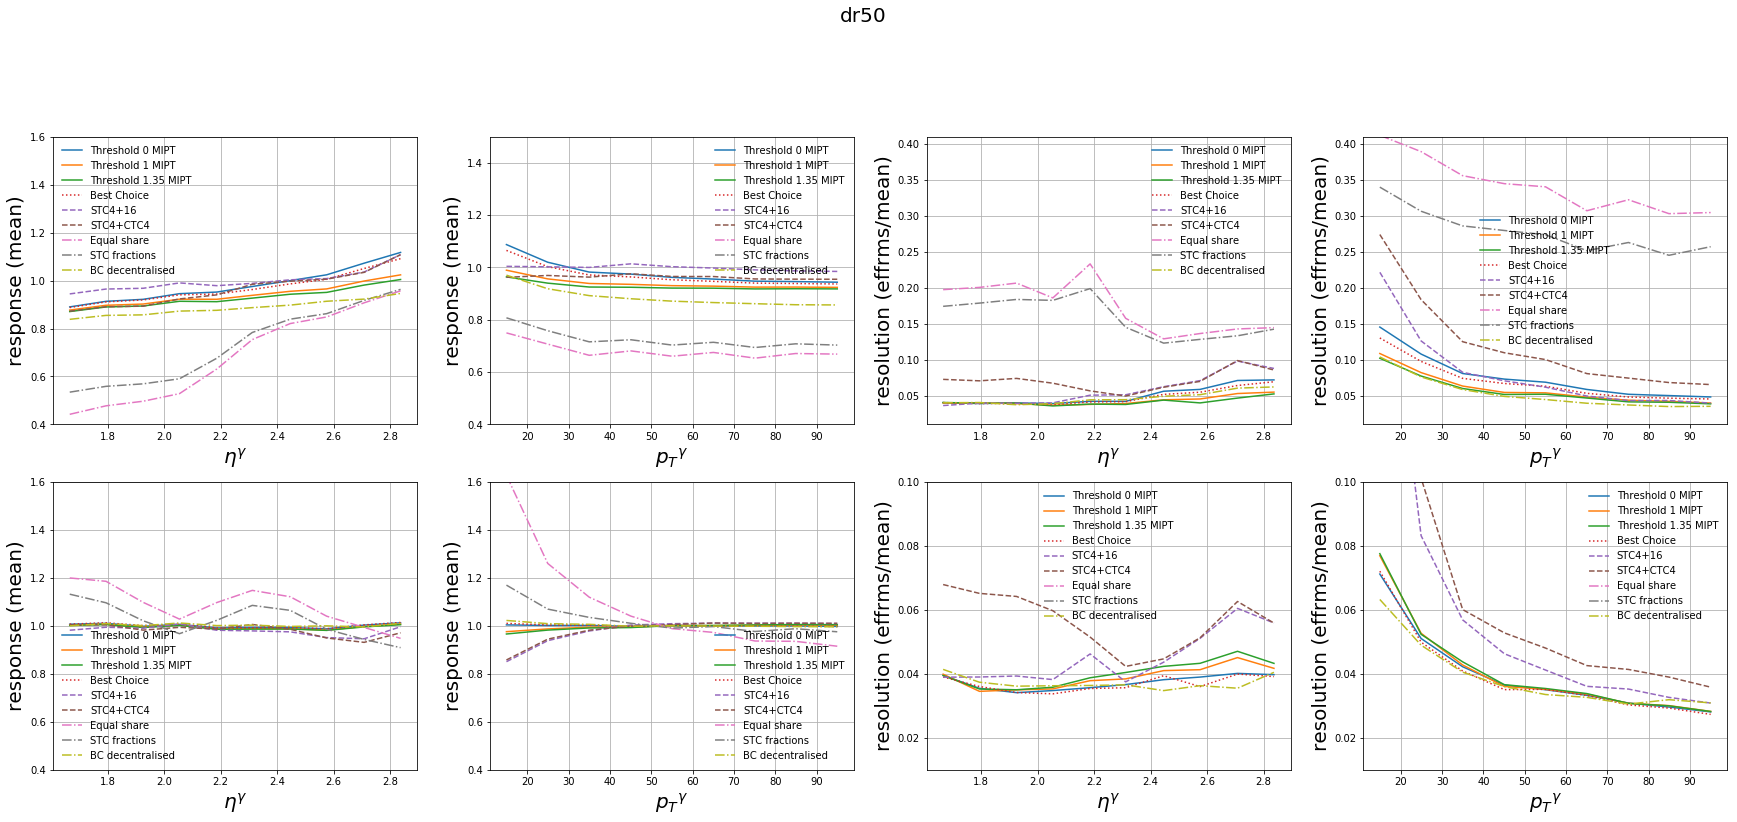

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

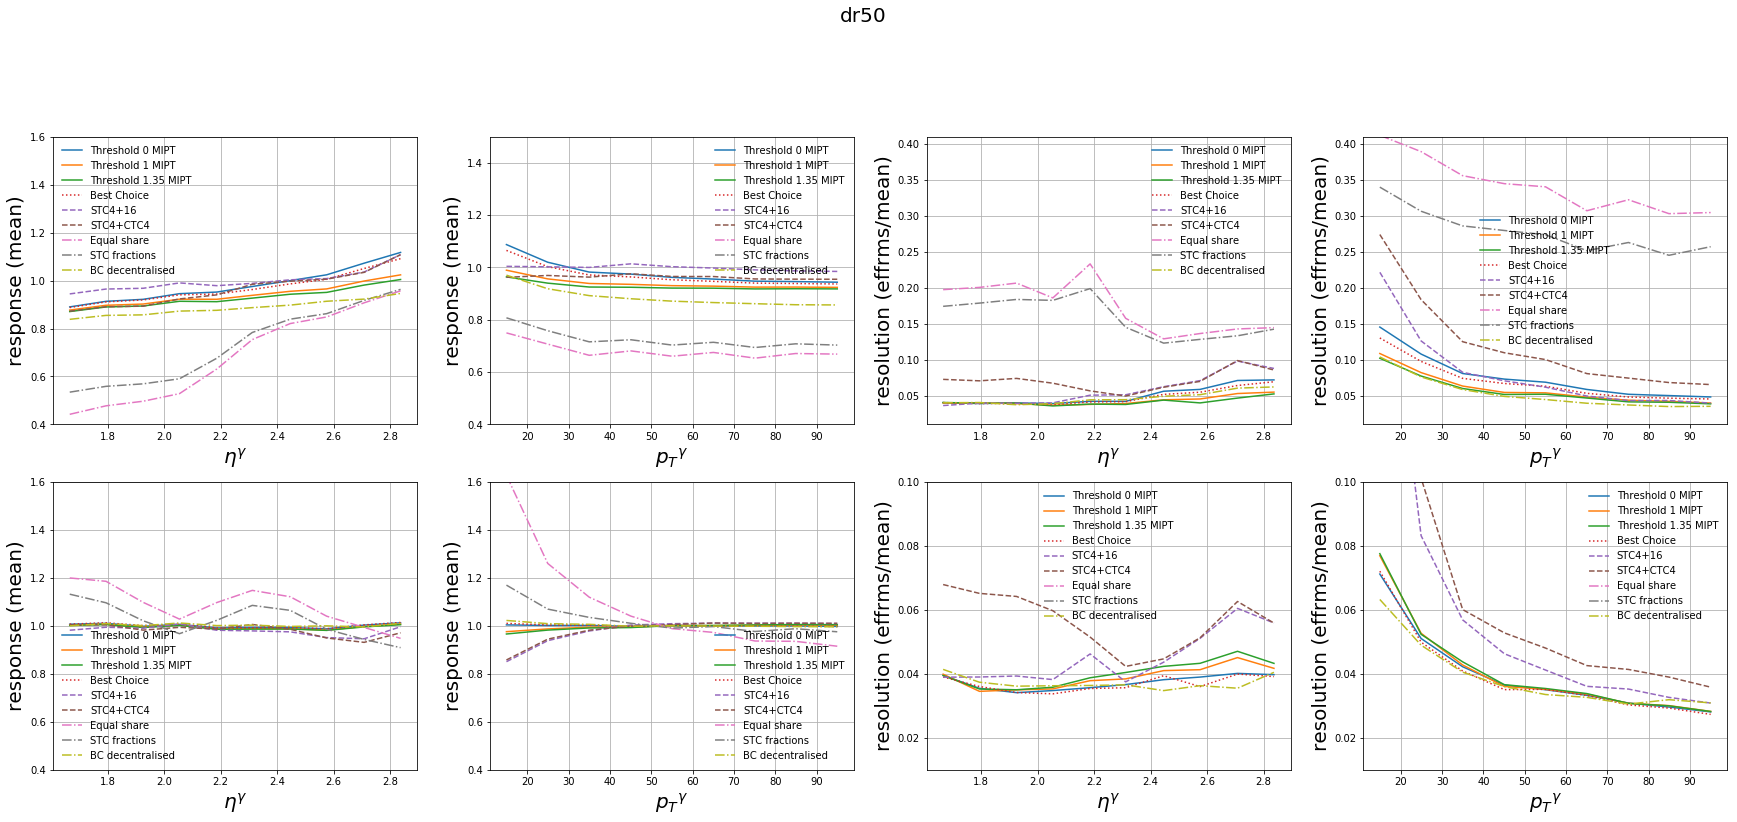

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

In [12]:
algoSelevents={}
for i in algoSel:
    resUnc = algoSel[i]['cl3d_pt']/algoSel[i]['genpart_pt']
    meanUnc = np.mean(resUnc)
    effrmsUnc = rmseff(resUnc)
    algoSel[i]['resCor_lsq'] = algoSel[i]['ClPt_blsq']/algoSel[i]['genpart_pt']  
    meanCor_lsq = np.mean(algoSel[i]['resCor_lsq'])
    
    selevents=((algoSel[i]['genpart_pt'] > 10.0))# & (abs(algoSel[i]['genpart_eta']) < 2.25))
                #& (algoSel[i]['genpart_pt'] < 40.0))
               # (np.abs(algoSel[i]['genpart_eta']) > 1.6) & (np.abs(algoSel[i]['genpart_eta']) < 1.73))
    algoSelevents[i] = algoSel[i][selevents]
    algoSelevents[i]['resCorSel_lsq'] = algoSelevents[i]['ClPt_blsq']/algoSelevents[i]['genpart_pt']
    
    algoSelevents[i]['bineta'] = ((np.abs(algoSelevents[i]['genpart_eta']) - 1.6)/0.13).astype('int32')
    algoSelevents[i]['binpt'] = ((algoSelevents[i]['genpart_pt']- 10.0)/10.0).astype('int32')
    algoSelevents[i]['resUnCor'] = algoSelevents[i]['cl3d_pt']/algoSelevents[i]['genpart_pt']
    algoSelevents[i]['abseta'] = np.abs(algoSelevents[i]['genpart_eta'])
    df_mean_eta = algoSelevents[i].groupby(['bineta']).mean()
    df_mean_pt = algoSelevents[i].groupby(['binpt']).mean()
    df_effrms_eta = algoSelevents[i].groupby(['bineta']).apply(lambda x: rmseff(x.resUnCor))
    df_effrms_pt = algoSelevents[i].groupby(['binpt']).apply(lambda x: rmseff(x.resUnCor))
    df_effrms_etaC = algoSelevents[i].groupby(['bineta']).apply(lambda x: rmseff(x.resCor_lsq))
    df_effrms_ptC = algoSelevents[i].groupby(['binpt']).apply(lambda x: rmseff(x.resCor_lsq))   
    
    df_meanerr_etaUnC = algoSelevents[i].groupby(['bineta']).apply(lambda x: (x.resUnCor).sem())
    df_meanerr_ptUnC = algoSelevents[i].groupby(['binpt']).apply(lambda x: (x.resUnCor).sem())
    df_meanerr_etaC = algoSelevents[i].groupby(['bineta']).apply(lambda x: (x.resCor_lsq).sem())
    df_meanerr_ptC = algoSelevents[i].groupby(['binpt']).apply(lambda x: (x.resCor_lsq).sem())  
    df_rmserr_etaUnC = algoSelevents[i].groupby(['bineta']).apply(lambda x: (rmseff(x.resUnCor)).std())
  
    Ntriglayer = len(cllayerpt[j])
    layerN = np.array([(t+1) for t in range(Ntriglayer)])
    if(calibration == 'direct' and PUmethod == 'sub'):
        coefflsq_plot = np.array([(coefflsq[p]) for p in range(len(coefflsq)-1)]) 

    if(i==0):
        fig = plt1.figure(num='performance',figsize=(30,18))
        fig.suptitle(algolabelPlot,fontsize=20)
    plt1.figure(num='performance')
    plt1.subplot(341)
    if(i<3):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resUnCor, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resUnCor, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resUnCor, linestyle='--', label=algolabels[i])
    if(i>5):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resUnCor, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.4,1.6)
    plt1.xlabel('$\eta^\gamma$',fontsize=20)
    plt1.ylabel('response (mean)',fontsize=20)
    plt1.legend(frameon=False)
    plt1.grid(True)
    plt1.subplot(342)
    if(i<3):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resUnCor, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resUnCor, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resUnCor, linestyle='--', label=algolabels[i])
    if(i>5):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resUnCor, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.4,1.5)
    plt1.xlabel('$p{_T}^{\gamma}$',fontsize=20)
    plt1.ylabel('response (mean)',fontsize=20)
    plt1.grid(True)
    plt1.legend(frameon=False)
    plt1.subplot(343)
    if(i<3):
        plt1.errorbar((df_mean_eta.abseta), df_effrms_eta/df_mean_eta.resUnCor, linestyle='-',  label=algolabels[i])
    if(i==3):
        plt1.errorbar((df_mean_eta.abseta), df_effrms_eta/df_mean_eta.resUnCor, linestyle=':',  label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar((df_mean_eta.abseta), df_effrms_eta/df_mean_eta.resUnCor, linestyle='--',  label=algolabels[i])
    if(i>5):
        plt1.errorbar((df_mean_eta.abseta), df_effrms_eta/df_mean_eta.resUnCor, linestyle='-.',  label=algolabels[i])
    plt1.ylim(0.01,0.41)
    plt1.xlabel('$\eta^\gamma$',fontsize=20)
    plt1.ylabel('resolution (effrms/mean)',fontsize=20)
    plt1.grid(True)
    plt1.legend(frameon=False)
    plt1.subplot(344)
    if(i<3): 
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt), df_effrms_pt/df_mean_pt.resUnCor, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt), df_effrms_pt/df_mean_pt.resUnCor, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt), df_effrms_pt/df_mean_pt.resUnCor, linestyle='--', label=algolabels[i])
    if(i>5):
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt), df_effrms_pt/df_mean_pt.resUnCor, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.01,0.41)
    plt1.xlabel('$p{_T}^{\gamma}$',fontsize=20)
    plt1.ylabel('resolution (effrms/mean)',fontsize=20)
    plt1.grid(True)
    plt1.legend(frameon=False)
    plt1.subplot(345)
    if(i<3):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resCor_lsq, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resCor_lsq, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resCor_lsq, linestyle='--', label=algolabels[i])
    if(i>5):    
        plt1.errorbar((df_mean_eta.abseta), df_mean_eta.resCor_lsq, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.4,1.6)
    plt1.xlabel('$\eta^\gamma$',fontsize=20)
    plt1.ylabel('response (mean)',fontsize=20)
    plt1.grid(True)
    plt1.legend(frameon=False)
    plt1.subplot(346)
    if(i<3):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resCor_lsq, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resCor_lsq, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resCor_lsq, linestyle='--', label=algolabels[i])
    if(i>5):    
        plt1.errorbar((df_mean_pt.genpart_pt), df_mean_pt.resCor_lsq, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.4,1.6)
    plt1.xlabel('$p{_T}^{\gamma}$',fontsize=20)
    plt1.ylabel('response (mean)',fontsize=20)
    plt1.grid(True)
    plt1.legend(frameon=False)
    plt1.subplot(347)
    if(i<3):
        plt1.errorbar((df_mean_eta.abseta),df_effrms_etaC/df_mean_eta.resCor_lsq, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar((df_mean_eta.abseta),df_effrms_etaC/df_mean_eta.resCor_lsq, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar((df_mean_eta.abseta),df_effrms_etaC/df_mean_eta.resCor_lsq, linestyle='--', label=algolabels[i])
    if(i>5): 
        plt1.errorbar((df_mean_eta.abseta),df_effrms_etaC/df_mean_eta.resCor_lsq, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.01,0.1)
    plt1.xlabel('$\eta^\gamma$',fontsize=20)
    plt1.ylabel('resolution (effrms/mean)',fontsize=20)
    plt1.grid(True)
    plt1.legend(frameon=False)
    plt1.subplot(348)
    if(i<3):
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt),df_effrms_ptC/df_mean_pt.resCor_lsq, linestyle='-', label=algolabels[i])
    if(i==3):
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt),df_effrms_ptC/df_mean_pt.resCor_lsq, linestyle=':', label=algolabels[i])
    if(i==4 or i==5):
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt),df_effrms_ptC/df_mean_pt.resCor_lsq, linestyle='--', label=algolabels[i])
    if(i>5): 
        plt1.errorbar(np.abs(df_mean_pt.genpart_pt),df_effrms_ptC/df_mean_pt.resCor_lsq, linestyle='-.', label=algolabels[i])
    plt1.ylim(0.01,0.1)
    plt1.xlabel('$p{_T}^{\gamma}$',fontsize=20)
    plt1.ylabel('resolution (effrms/mean)',fontsize=20)
    plt1.legend(frameon=False)
    plt1.grid(True)
    plt1.savefig('performancezoomed'+algolabelPlot+'.png')   
    plt1.figure(figsize=(18,7)) 
    if(plotresolution=='True'):
        #plt1.subplot(131)
        #plt1.hist(algoSel[i]['cl3d_pt'],bins=np.linspace(0.0,150,151),histtype='step',color='black',label='Uncorrected mean = '+str(np.around(meanUn, decimals = 4))+': effrms = '+str(np.around(effrmsUn, decimals = 4)))
        #plt1.hist(algoSel[i]['ClPt_lin'],bins=np.linspace(0.0,150,151),histtype='step',color='red',label='LSQ'+': m = '+str(np.around(meanCor_lin, decimals = 4))+': effrms = '+str(np.around(effrmsCor_lin, decimals = 4)))
        #plt1.hist(algoSel[i]['ClPt_blsq'],bins=np.linspace(0.0,150,151),histtype='step',color='blue',label='Bounded LSQ'+': m = '+str(np.around(meanCor_lsq, decimals = 4))+': effrms = '+str(np.around(effrmsCor_lsq, decimals = 4)))  
        #plt1.xlabel('Cl3d_pT')
        #plt1.title(algos[i]);
        plt1.subplot(121)
        plt1.hist(resUnc,bins=np.linspace(0.1,1.6,151),histtype='step',color='black',label='Uncorrected mean = '+str(np.around(meanUnc, decimals = 4))+': effrms = '+str(np.around(effrmsUnc, decimals = 4)))
        #plt1.hist(algoSel[i]['resCor_lin'],bins=np.linspace(0.1,1.4,131),histtype='step',color='red',label='LSQ'+': m = '+str(np.around(meanCor_lin_subPU, decimals = 4))+': effrms = '+str(np.around(effrmsCor_lin, decimals = 4)))
        plt1.hist(algoSel[i]['resCor_lsq'],bins=np.linspace(0.1,1.6,151),histtype='step',color='blue',label='Bounded LSQ'+': m = '+str(np.around(meanCor_lsq, decimals = 4))+': effrms = '+str(np.around(rmseff(algoSel[i]['resCor_lsq']), decimals = 4)))
        plt1.xlabel('$p{_T}^{Cl3D}$/$p{_T}^{\gamma}$',fontsize=15)
        plt1.title(algolabelPlot+' + Cl: '+algolabels[i]);
        plt1.legend(loc=2,frameon=False)
        plt1.subplot(122)
        plt1.scatter(layerN,coefflsq, c='green')
        if(calibration == 'direct' and PUmethod == 'sub'):
            plt1.annotate('PU weight = '+str(np.around(coefflsq[14], decimals = 4)), xy=(0.6,0.9),xycoords='axes fraction',fontsize=14)
        plt1.axhline(y=1.0, color='r', linestyle='-') ##y=meanBounds
        plt1.axhline(y=0.5, color='r', linestyle='--') ##y=meanBounds/2
        plt1.axhline(y=2.0, color='r', linestyle='--') ##y=meanBounds*2
        plt1.xticks(layerN)
        plt1.legend()
        plt1.xlabel('trigger layer',fontsize=15)
        plt1.ylabel('layer weights',fontsize=15)
        plt1.title(algolabelPlot+' + Cl: '+algolabels[i]);
        plt1.savefig('Resolution'+ algos[i] +'.png')